#**Final Report - Group 4**
**Please Add the names of group members:**
Cameron Hoover -
Bryan Olen -
Karissa Bryant

#**Executive Summary**

The data was cleaned and prepared for modeling, addressing issues such as missing values and data type inconsistencies. Minimal encoding was necessary. Multiple models were tested in order to predict outcomes based on the processed data, comparing performance metrics like accuracy, precision, recall, and F1-score to identify the most effective model.

#**Introduction**

This dataset was sourced from Kaggle (https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023), and includes data spanning from 2020-2023 "Salaries of Different Data Science Fields in the Data Science Domain."
The primary objective of our analysis was:
1. To evaluate how experience level affects salary in different job roles.
2. To determine if/how the predictability of salary varies with employee rank, and what factors, such as experience level, might contribute to these variations in predictability across different types of employees.

# **Data Dictionary**


In [6]:
import pandas as pd

df = pd.read_csv('data_dictionary.csv')
display(df)

,Name,Modeling Data Type,Description,Unit of Measurement,Input/Target
0,Employment_Type,qualitative - nominal,Type of Employment,"0=Full Time, 1=Part Time, 2=Contract, 3=Freelance",Input
1,Experience_Level,qualitative - ordinal,Level of Experience,"0=Entry, 1=Mid, 2=Senior, 3=Executive",Input
2,Salary,qualitative - continuous,Salaries of Employees,USD ($),Target


# **Questions Answered by Analysis**
* Plot suggests an upward trend, indicating that higher experience levels might be associated with higher salaries (Experience Level vs Salary USD)
* A clear upward or downward trend is not indicated, suggesting that employment type might not have a strong linear relationship with salary. (Emp Type vs Salary USD)
* We've examined how well our data fits certain statistical models that help us predict salaries more accurately.

#**Data Exploration and Visualization**

In [7]:
# Load original data
df = pd.read_csv('v7_Latest_Data_Science_Salaries.csv')

# Print info, describe, and display the first 5 rows
print(df.info(), '\n')
print(df.describe(), '\n')
display(df.head())

# Set float_format to supress scientific notation
pd.options.display.float_format = '{:.0f}'.format


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB
None 

        Salary  Salary in USD  Year
count     5736           5736  5736
mean    183165         144264  2023
std     563780          70647     1
min      14000          15000  2020
25%      95000          93300 

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


In [8]:
# Get the counts of each response for the Expierience Level and Empl Type attributes
print(df['Experience Level'].value_counts(), '\n')
print(df['Employment Type'].value_counts())

Experience Level
Senior       3530
Mid          1455
Entry         524
Executive     227
Name: count, dtype: int64 

Employment Type
Full-Time    5690
Contract       19
Part-Time      15
Freelance      12
Name: count, dtype: int64


#**Data Preparation**

In [9]:
# Condensed the following attributes :
# "Employee Type to Empl Type",
# "Salary in USD to Salary USD"

df.rename(columns={'Salary in USD' : 'Salary USD', 'Employment Type' : 'Empl Type'}, inplace=True)
df.to_csv('Salary_Final_Report.csv', index=False)

df[:1]

,Job Title,Empl Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024


In [10]:
# Load data file
df = pd.read_csv('Salary_Final_Report.csv')

# Define categories and corresponding column names
categories = {'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
              'Empl Type': ['Freelance', 'Contract', 'Part-Time', 'Full-Time']
}

# Convert categories to ordered categorical types and encode them as codes
for column, levels in categories.items():
    df[column] = pd.Categorical(df[column], categories=levels, ordered=True)
    df[column] = df[column].cat.codes

# Select columns for final DataFrame
final_columns = ['Empl Type', 'Experience Level', 'Salary USD']
df = df[final_columns]

# Save the final DataFrame to a new CSV file, ensure no index is included
df.to_csv('Salary_Final_Report.csv', index=False)

# Display the first few rows of the final dataset to verify the transformation
df.head()

,Empl Type,Experience Level,Salary USD
0,3,1,138000
1,3,1,86000
2,3,0,179000
3,3,0,112000
4,3,1,92000


#**Data Modeling**
We selected linear regression as our modeling approach because the data set we chose consists of mostly categorical variables, and many of them were unusable or highly collinear to one another. Having few valid input variables, we decided on linear regression to test what kind of correlation can be found between an employee's salary, which is our target, and their employment type and experience level.

* Here we will train our linear regression model using the scikit-learn library
* Includes tools for splitting the data, scaling features, performing linear regression, and calculating model performance metrics.
* divided into 'features' (X) and 'target' (y). 'Features' are the variables used to predict the target, which in this case is 'Salary USD'. The data is then split into training and testing sets, with 80% used for training the model and 20% used for testing its performance.
* This is done to evaluate the model on data it hasn't seen during training, ensuring that our assessment of its performance is unbiased.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the data
X = df.drop(columns=['Salary USD'])
y = df['Salary USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
predictions = lin_reg.predict(X_test)

# Calculate and print performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 3841343982.124389
R^2 Score: 0.16281980956727493


#**Modeling Assumptions Satisfied**

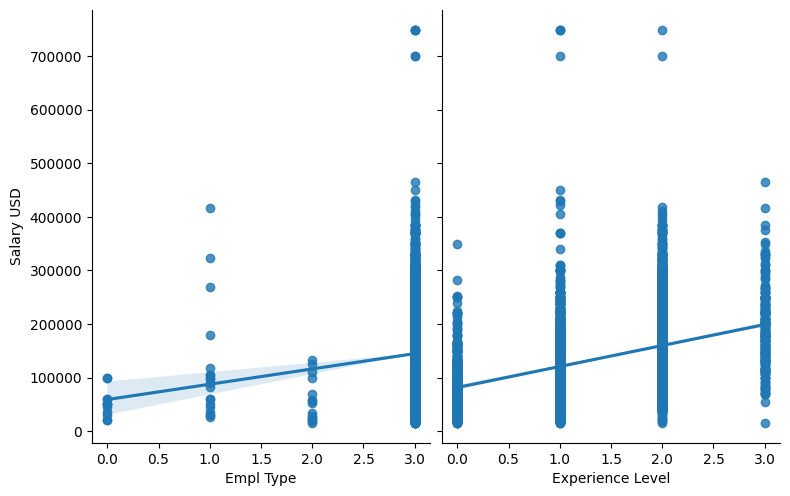

In [12]:
# Assumptions Include - Linearity, Homoscedasitcity, Normality, and Independence

sns.pairplot(df, x_vars=["Empl Type", "Experience Level"], y_vars=["Salary USD"],
             height=5,aspect=.8,kind="reg");



* Based on the data, it seems Employee Type has more effect on salary than experience level

<Axes: xlabel='Empl Type', ylabel='Salary USD'>

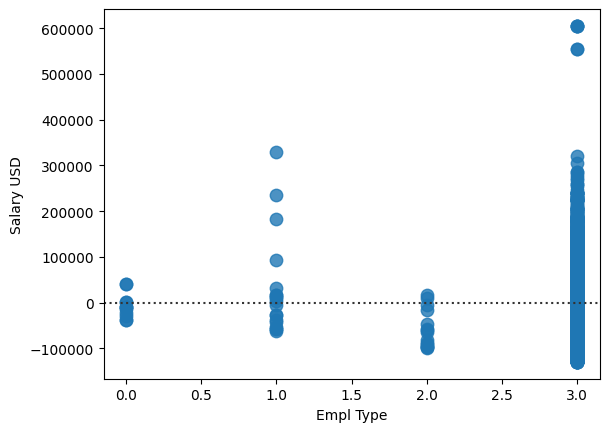

In [13]:
# Linearity

sns.residplot(x="Empl Type", y="Salary USD", data=df, scatter_kws={"s": 80})

# If data points are randomly scattered on either side of the horizontal line,
# the assumption of linearity and is met

* We wanted to whether salary consistently increases as experience increases.
* Our findings suggested a general trend that as employees move from Entry to Executive levels, their salaries tend to increase. However, the relationship wasn't perfectly linear.
* Instead of each experience level adding a fixed amount to a salary (like each stair step raising you the same height), there were variations. For example, the jump in salary from Mid to Senior level might be larger or smaller than from Entry to Mid.

Text(0, 0.5, 'Residuals')

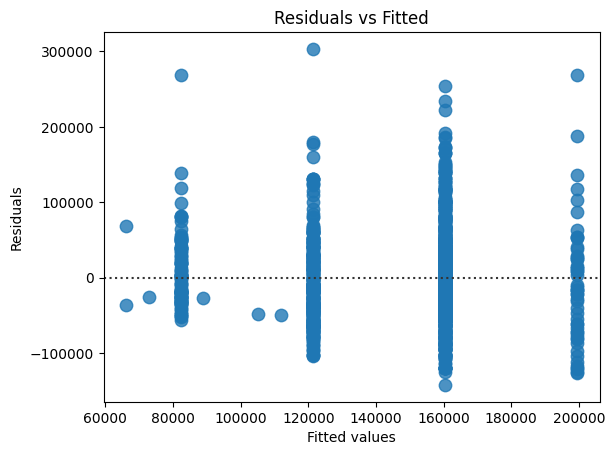

In [14]:
# Homoscedasticity

residuals = y_test - predictions
ax = sns.residplot(x=predictions, y=residuals, scatter_kws={"s": 80})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')


* our ability to predict salaries accurately should be consistent across all levels of experience or job types.
* Whether we’re predicting the salary of an entry-level analyst or a senior manager, the predictions should be equally precise (or imprecise), and the errors (differences between predicted and actual salaries) should look similar, without spreading out more for one group than another.
* we are looking for reliability and consistency here.

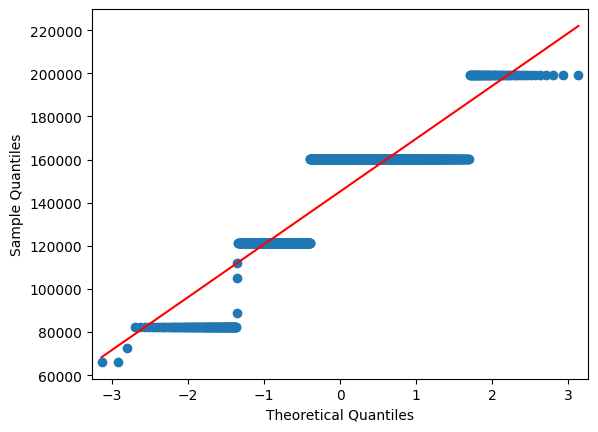

Mean of Residuals -1956.2041847075272


<ipython-input-15-757d4ab6a8cb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


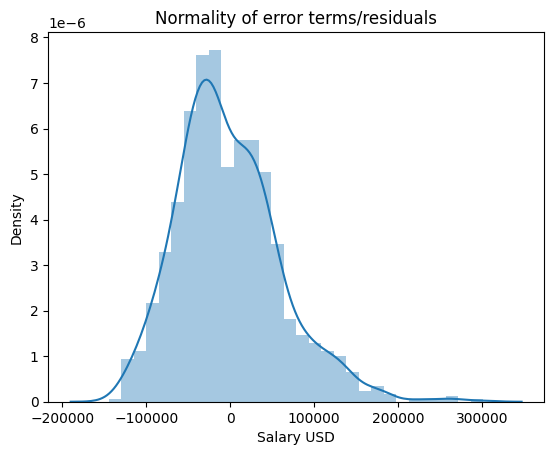

In [15]:
# Normality

import numpy as np
import statsmodels.api as sm
import pylab as py

sm.qqplot(predictions, line ='r')
py.show()

mean_residuals = np.mean(residuals)
print(f'Mean of Residuals {mean_residuals}')

p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')


* for our models to work best, the data needs to meet certain conditions—like showing a straight-line relationship between variables, having consistent patterns in data spread, and data points following a common pattern (or being "normal").
* Our salary data doesn't perfectly fit a bell curve when plotted, indicating complexities in how salaries are structured.

In [16]:
# Independence/Autocoorelation - Durbin-Watson test

from statsmodels.formula.api import ols
model = ols('Q("Salary USD") ~ Q("Empl Type")', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Q("Salary USD")   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     32.57
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.21e-08
Time:                        23:38:28   Log-Likelihood:                -72167.
No. Observations:                5736   AIC:                         1.443e+05
Df Residuals:                    5734   BIC:                         1.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.89e+04    1.5e+04      3.

* Results are 1.71, since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

#**Visualization and Interpretation of the Model**

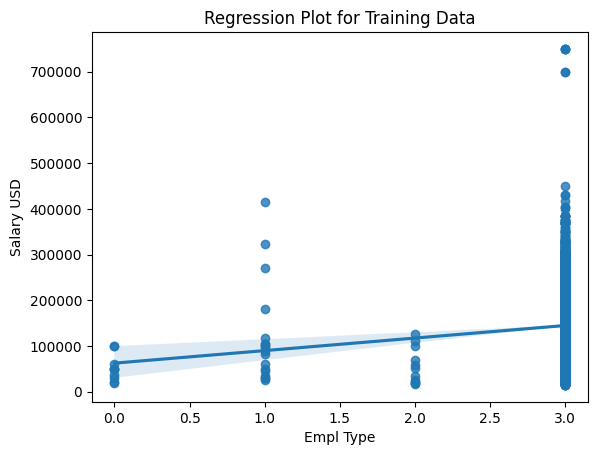

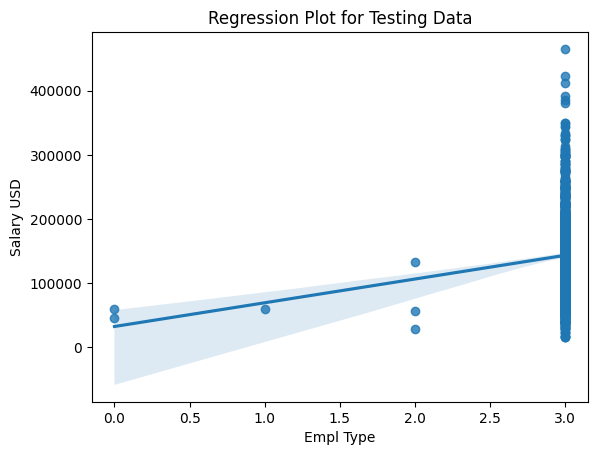

In [17]:
from sklearn.model_selection import train_test_split

X = df[['Empl Type']]
y = df['Salary USD']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

train_df = pd.concat([X_train, y_train], axis=1)

sns.regplot(x="Empl Type", y="Salary USD", data=train_df)
plt.title('Regression Plot for Training Data')
plt.xlabel('Empl Type')
plt.ylabel('Salary USD')
plt.show()

test_df = pd.concat([X_test, y_test], axis=1)

sns.regplot(x="Empl Type", y="Salary USD", data=test_df)
plt.title('Regression Plot for Testing Data')
plt.xlabel('Empl Type')
plt.ylabel('Salary USD')
plt.show()


* The data of the model shows that as the employee type changes, going up in rank, that it becomes harder to predict your salary, which could be caused by a number of different factors, including experience level.
* Jobs with more experience tend to have higher salaries, which is expected, but the relationship isn’t perfectly straight or consistent across different job types.


#**Evaluation of Model Strength**

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('The lower the MAE, the better.')
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))


print('\nThe lower the MSE, the closer the forecast is to actual value')
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))


print('\nHow well the prediction works in absolute terms.')
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))


print('\nHow well the prediction works in percentage terms.')
print("R2-Square:", r2_score(y_test, predictions))


The lower the MAE, the better.
Mean Absolute Error(MAE): 48607.87213619605

The lower the MSE, the closer the forecast is to actual value
Mean Squared Error(MSE): 3841343982.124389

How well the prediction works in absolute terms.
Root Mean Squared Error(RMSE): 61978.57679976517

How well the prediction works in percentage terms.
R2-Square: 0.16281980956727493


* It appears that our margins of error seem to be very high, with a prediction value of only 16.2%, it shows this may not be the best way to classify this data.
* while our current model provides a baseline, its predictions are not as reliable as they could be, which might affect decisions based on these predictions.
* We might consider exploring other methods or refining our model to handle these complexities

#**Member Contributions**
1. Cameron Hoover: Data Preparation and Data Modeling; revisions and evaluation of data visualization/exploration; video evaluation
2. Karissa Bryant: Summary, Intro, Data Visualization; final video recording and presentation; final code evaluation.
3. Bryan Olen: Modeling Assumptions, Visualization/Interpretation, Evaluating Model Strength; video evaluation